## Chapter 9. Dimensionality Reduction Using Feature Extraction
### 9.0 Introduction 

It is common to have access to thousands and even hundreds of thousands of features. For example, in Chapter 8 we transformed a 256 × 256–pixel color image into 196,608 features. Furthermore, because each of these pixels can take one of 256 possible values, there ends up being 256196608 different configurations our observation can take. This is problematic because we will practically never be able to collect enough observations to cover even a small fraction of those configurations and our learning algorithms do not have enough data to operate correctly. 

Fortunately, not all features are created equal and the goal of feature extraction for dimensionality reduction is to transform our set of features, $P_{original}$, such that we end up with a new set, $P_{new}$, where $P_{original}$ > $P_{new}$, while still keeping much of the underlying information. Put another way, we reduce the number of features with only a small loss in our data’s ability to generate high-quality predictions. In this chapter, we will cover a number of feature extraction techniques to do just this. 
 
 One downside of the feature extraction techniques we discuss is that the new features we generate will not be interpretable by humans. They will contain as much or nearly as much ability to train our models, but will appear to the human eye as a collection of random numbers. If we wanted to maintain our ability to interpret our models, dimensionality reduction through feature selection is a better option. 

### 9.1 Reducing Features Using Principal Components

#### Problem 

Given a set of features, you want to reduce the number of features while retaining the variance in the data. 

#### Solution 

Use principal component analysis with scikit’s PCA:



In [9]:
# Load libraries
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn import datasets

# Load the data
digits = datasets.load_digits()
#print(digits)
# Standardize the feature matrix
features = StandardScaler().fit_transform(digits.data)

# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)

# Conduct PCA
features_pca = pca.fit_transform(features)

# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_pca.shape[1])


Original number of features: 64
Reduced number of features: 54


#### Discussion 

Principal component analysis (PCA) is a popular linear dimensionality reduction technique. PCA projects observations onto the (hopefully fewer) principal components of the feature matrix that retain the most variance. PCA is an unsupervised technique, meaning that it does not use the information from the target vector and instead only considers the feature matrix. 

For a mathematical description of how PCA works, see the external resources listed at the end of this recipe. However, we can understand the intuition behind PCA using a simple example. In the following figure, our data contains two features, x1 and x2. Looking at the visualization, it should be clear that observations are spread out like a cigar, with a lot of length and very little height. More specifically, we can say that the variance of the “length” is significantly greater than the “height.” Instead of length and height, we refer to the “directions” with the most variance as the first principal component and the “direction” with the second-most variance as the second principal component (and so on). 

If we wanted to reduce our features, one strategy would be to project all observations in our 2D space onto the 1D principal component. We would lose the information captured in the second principal component, but in some situations that would be an acceptable trade-off. This is PCA. 

PCA is implemented in **scikit-learn** using the pca method. **n_components** has two operations, depending on the argument provided. If the argument is greater than 1, **n_components** will return that many features. This leads to the question of how to select the number of features that is optimal. Fortunately for us, if the argument to **n_components** is between 0 and 1, pca returns the minimum amount of features that retain that much variance. It is common to use values of 0.95 and 0.99, meaning 95% and 99% of the variance of the original features has been retained, respectively. **whiten=True** transforms the values of each principal component so that they have zero mean and unit variance. Another parameter and argument is **svd_solver="randomized"**, which implements a stochastic(having a random probability distribution or pattern that may be analyzed statistically but may not be predicted precisely) algorithm to find the first principal components in often significantly less time. 

The output of our solution shows that PCA let us reduce our dimensionality by 10 features while still retaining 99% of the information (variance) in the feature matrix.



![](images/ML_withPython_Ch09_9.1_Fig1.png)

####  See Also 

[scikit-learn documentation on PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)

[Choosing the Number of Principal Components](https://www.coursera.org/lecture/machine-learning/choosing-the-number-of-principal-components-S1bq1)

[Principal component analysis with linear algebra](http://www.math.union.edu/~jaureguj/PCA.pdf)


### 9.2 Reducing Features When Data Is Linearly Inseparable 

#### Problem 

You suspect you have linearly inseparable data and want to reduce the dimensions. 

#### Solution

Use an extension of principal component analysis that uses kernels to allow for non-linear dimensionality reduction:


In [2]:
# Load libraries
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

# Create linearly inseparable data
features, _ = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)

# Apply kernal PCA with radius basis function (RBF) kernel
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
features_kpca = kpca.fit_transform(features)

print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_kpca.shape[1]) 

Original number of features: 2
Reduced number of features: 1


In [ ]:
features

In [3]:
#### Discussion

PCA is able to reduce the dimensionality of our feature matrix (e.g., the number of features). Standard PCA uses linear projection to reduce the features. If the data is linearly separable (i.e., you can draw a straight line or hyperplane between different classes) then PCA works well. However, if your data is not linearly separable (e.g., you can only separate classes using a curved decision boundary), the linear transformation will not work as well. In our solution we used scikit-learn’s make_circles to generate a simulated dataset with a target vector of two classes and two features. make_circles makes linearly inseparable data; specifically, one class is surrounded on all sides by the other class.

![](images/ML_withPython_Ch09_9.2_Fig1.png)

If we used linear PCA to reduce the dimensions of our data, the two classes would be linearly projected onto the first principal component such that they would become intertwined.


array([[ 0.23058395, -0.10671314],
       [-0.0834218 , -0.22647078],
       [ 0.9246533 , -0.71492522],
       ...,
       [ 0.02517206,  0.00964548],
       [-0.92836187,  0.06693357],
       [ 1.03502248,  0.54878286]])

#### Discussion

PCA is able to reduce the dimensionality of our feature matrix (e.g., the number of features). Standard PCA uses linear projection to reduce the features. If the data is linearly separable (i.e., you can draw a straight line or hyperplane between different classes) then PCA works well. However, if your data is not linearly separable (e.g., you can only separate classes using a curved decision boundary), the linear transformation will not work as well. In our solution we used scikit-learn’s make_circles to generate a simulated dataset with a target vector of two classes and two features. make_circles makes linearly inseparable data; specifically, one class is surrounded on all sides by the other class.

![](images/ML_withPython_Ch09_9.2_Fig1.png)

If we used linear PCA to reduce the dimensions of our data, the two classes would be linearly projected onto the first principal component such that they would become intertwined.


![](images/ML_withPython_Ch09_9.2_Fig2.png)

Kernels allow us to project the linearly inseparable data into a higher dimension where it is linearly separable; this is called the kernel trick. Don’t worry if you don’t understand the details of the kernel trick; just think of kernels as different ways of projecting the data. There are a number of kernels we can use in scikit-learn’s kernelPCA, specified using the kernel parameter. A common kernel to use is the Gaussian radial basis function kernel rbf, but other options are the polynomial kernel (poly) and sigmoid kernel (sigmoid). We can even specify a linear projection (linear), which will produce the same results as standard PCA. 

One downside of kernel PCA is that there are a number of parameters we need to specify. For example, in Recipe 9.1 we set n_components to 0.99 to make PCA select the number of components to retain 99% of the variance. We don’t have this option in kernel PCA. Instead we have to define the number of parameters (e.g., n_components=1). Furthermore, kernels come with their own hyperparameters that we will have to set; for example, the radial basis function requires a gamma value. 

So how do we know which values to use? Through trial and error. Specifically we can train our machine learning model multiple times, each time with a different kernel or different value of the parameter. Once we find the combination of values that produces the highest quality predicted values, we are done. We will learn about this strategy in depth in Chapter 12.


#### See Also 

[scikit-learn documentation on Kernel PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA)

[Kernel tricks and nonlinear dimensionality reduction via RBF kernel PCA ](http://sebastianraschka.com/Articles/2014_kernel_pca.html)


### 9.3 Reducing Features by Maximizing Class Separability

#### Problem 

You want to reduce the features to be used by a classifier. 

#### Solution 
Try linear discriminant analysis (LDA) to project the features onto component axes that maximize the separation of classes:  

In [4]:
# Load libraries
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load Iris flower dataset:
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create and run an LDA, then use it to transform the features
lda = LinearDiscriminantAnalysis(n_components=1)
features_lda = lda.fit(features, target).transform(features)

# Print the number of features
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_lda.shape[1])

Original number of features: 4
Reduced number of features: 1


We can use explained_variance_ratio_ to view the amount of variance explained by each component. In our solution the single component explained over 99% of the variance: 

In [5]:
lda.explained_variance_ratio_

array([0.9912126])

#### Discussion

LDA is a classification that is also a popular technique for dimensionality reduction. LDA works similarly to principal component analysis (PCA) in that it projects our feature space onto a lower-dimensional space. However, in PCA we were only interested in the component axes that maximize the variance in the data, while in LDA we have the additional goal of maximizing the differences between classes. In this pictured example, we have data comprising two target classes and two features. If we project the data onto the y-axis, the two classes are not easily separable (i.e., they overlap), while if we project the data onto the x-axis, we are left with a feature vector (i.e., we reduced our dimensionality by one) that still preserves class separability. In the real world, of course, the relationship between the classes will be more complex and the dimensionality will be higher, but the concept remains the same.


![](images/ML_withPython_Ch09_9.3_Fig1.png)

In scikit-learn, LDA is implemented using LinearDiscriminantAnalysis, which includes a parameter, n_components, indicating the number of features we want returned. To figure out what argument value to use with n_components (e.g., how many parameters to keep), we can take advantage of the fact that explained_variance_ratio_ tells us the variance explained by each outputted feature and is a sorted array. For example: 


In [6]:

lda.explained_variance_ratio_ 


array([0.9912126])

Specifically, we can run LinearDiscriminantAnalysis with n_components set to None to return the ratio of variance explained by every component feature, then calculate how many components are required to get above some threshold of variance explained (often 0.95 or 0.99):

In [7]:
# Create and run LDA
lda = LinearDiscriminantAnalysis(n_components=None)
features_lda = lda.fit(features, target)

# Create array of explained variance ratios
lda_var_ratios = lda.explained_variance_ratio_

# Create function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0

    # Set initial number of features
    n_components = 0

    # For the explained variance of each feature:
    for explained_variance in var_ratio:

        # Add the explained variance to the total
        total_variance += explained_variance

        # Add one to the number of components
        n_components += 1

        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break

    # Return the number of components
    return n_components

In [8]:
# Run function
select_n_components(lda_var_ratios, 0.95)


1

#### See Also 

[Comparison of LDA and PCA 2D projection of Iris dataset](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py)

[Linear Discriminant Analysis](http://sebastianraschka.com/Articles/2014_python_lda.html)


# Comparison of LDA and PCA 2D projection of Iris dataset

The Iris dataset represents 3 kind of Iris flowers (Setosa, Versicolour and Virginica) with 4 attributes: sepal length, sepal width, petal length and petal width.

Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. Here we plot the different samples on the 2 first principal components.

Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.

Automatically created module for IPython interactive environment
explained variance ratio (first two components): [0.92461872 0.05306648]


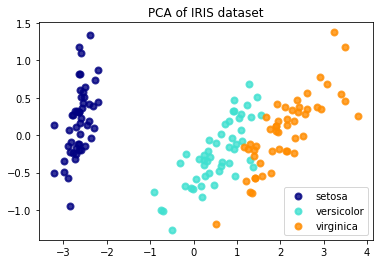

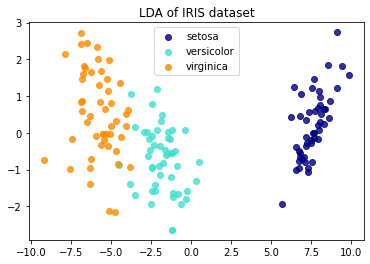

In [19]:
# Code from comparison of LDA and PCS link above
print(__doc__)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

### 9.4 Reducing Features Using Matrix Factorization 

#### Problem 

You have a feature matrix of nonnegative values and want to reduce the dimensionality. 

#### Solution 

Use non-negative matrix factorization (NMF) to reduce the dimensionality of the feature matrix:


In [10]:
# Load libraries
from sklearn.decomposition import NMF
from sklearn import datasets

# Load the data
digits = datasets.load_digits()

# Load feature matrix
features = digits.data

# Create, fit, and apply NMF
nmf = NMF(n_components=10, random_state=1)
features_nmf = nmf.fit_transform(features)

# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_nmf.shape[1])

Original number of features: 64
Reduced number of features: 10


#### Discussion 

Non-negative matrix factorization (NMF)  is an unsupervised technique for linear dimensionality reduction that factorizes (i.e., breaks up into multiple matrices whose product approximates the original matrix) the feature matrix into matrices representing the latent relationship between observations and their features. Intuitively, NMF can reduce dimensionality because in matrix multiplication, the two factors (matrices being multiplied) can have significantly fewer dimensions than the product matrix. Formally, given a desired number of returned features, r, NMF factorizes our feature matrix such that: 

<font size = 16> V ~ WH </font>

where V is our d × _n feature matrix (i.e., d features, n observations), W is a d × r, and H is an r × n matrix. By adjusting the value of r we can set the amount of dimensionality reduction desired. 

One major requirement of NMA is that, as the name implies, the feature matrix cannot contain negative values. Additionally, unlike PCA and other techniques we have examined, NMA does not provide us with the explained variance of the outputted features. Thus, the best way for us to find the optimum value of n_components is by trying a range of values to find the one that produces the best result in our end model (see Chapter 12).


#### See Also 

[Non-Negative Matrix Factorization (NMF)-link.didnot.work]


### 9.5 Reducing Features on Sparse Data

#### Problem 

You have a sparse feature matrix and want to reduce the dimensionality. 

#### Solution 

Use Truncated Singular Value Decomposition (TSVD):


In [13]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
import numpy as np

# Load the data
digits = datasets.load_digits()

# Standardize feature matrix
features = StandardScaler().fit_transform(digits.data)

# Make sparse matrix
features_sparse = csr_matrix(features)

# Create a TSVD
tsvd = TruncatedSVD(n_components=10)

# Conduct TSVD on sparse matrix
features_sparse_tsvd = tsvd.fit(features_sparse).transform(features_sparse)
# Show results
print("Original number of features:", features_sparse.shape[1])
print("Reduced number of features:", features_sparse_tsvd.shape[1])



Original number of features: 64
Reduced number of features: 10


#### Discussion 

TSVD is similar to PCA and in fact, PCA actually often uses non-truncated Singular Value Decomposition (SVD) in one of its steps. Inregular SVD, given d features, SVD will create factor matrices that are d × d, whereas TSVD will return factors that are n × n, where n is previously specified by a parameter. The practical advantage of TSVD is that unlike PCA, it works on sparse feature matrices. 

One issue with TSVD is that because of how it uses a random number generator, the signs of the output can flip between fittings. An easy workaround is to use fit only once per preprocessing pipeline, then use transform multiple times. 

As with linear discriminant analysis, we have to specify the number of features (components) we want outputted. This is done with the n_components parameter. A natural question is then: what is the optimum number of components? One strategy is to include n_components as a hyperparameter to optimize during model selection (i.e., choose the value for n_components that produces the best trained model). Alternatively, because TSVD provides us with the ratio of the original feature matrix’s variance explained by each component, we can select the number of components that explain a desired amount of variance (95% or 99% are common values). For example, in our solution the first three outputted components explain approximately 30% of the original data’s variance:

In [14]:
# Sum of first three components' explained variance ratios
tsvd.explained_variance_ratio_[0:3].sum()


0.30039385379082006

We can automate the process by creating a function that runs TSVD with n_components set to one less than the number of original features and then calculate the number of components that explain a desired amount of the original data’s variance:


In [16]:
# Create and run an TSVD with one less than number of features
tsvd = TruncatedSVD(n_components=features_sparse.shape[1]-1)
features_tsvd = tsvd.fit(features)
# List of explained variances
tsvd_var_ratios = tsvd.explained_variance_ratio_



In [17]:
# Create a function
def select_n_components(var_ratio, goal_var):
    # Set initial variance explained so far
    total_variance = 0.0

    # Set initial number of features
    n_components = 0

    # For the explained variance of each feature:
    for explained_variance in var_ratio:

        # Add the explained variance to the total
        total_variance += explained_variance

        # Add one to the number of components
        n_components += 1

        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break

    # Return the number of components
    return n_components


In [18]:
# Run function
select_n_components(tsvd_var_ratios, 0.95)


40

#### See Also 

[scikit-learn documentation TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html#sklearn.decomposition.TruncatedSVD)
